# 第5章 確率関数

## 5.1 確率質量関数



### 5.1.2 二項分布



リスト5.1: 二項分布の例

Text(0, 0.5, '確率')

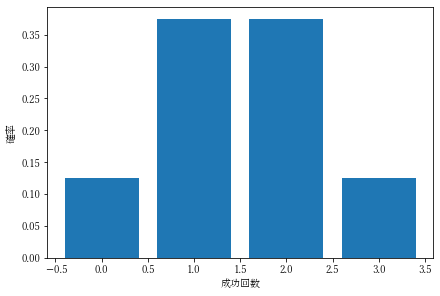

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['font.family'] = 'Yu Mincho'

n = 3
p = 0.5
x = np.arange(n + 1)

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(x, stats.binom.pmf(x, n, p))
ax.set_xlabel('成功回数')
ax.set_ylabel('確率')

リスト5.2: 二項分布におけるパラメータ $n$ と $p$ の影響



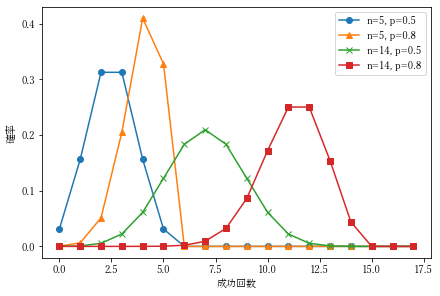

In [2]:
ns = [5, 5, 14, 14]
ps = [0.5, 0.8, 0.5, 0.8]
ls = ['-o', '-^', '-x', '-s']
x = np.arange(18)

fig, ax = plt.subplots(constrained_layout=True)

for n, p, l in zip(ns, ps, ls):
    ax.plot(x, stats.binom.pmf(x, n, p), l,
            label=f'n={n}, p={p}')

ax.set_xlabel('成功回数')
ax.set_ylabel('確率')
ax.legend()

リスト5.3: 二項分布の期待値の計算



In [3]:
n = 3
p = 0.5

stats.binom.mean(n, p)

1.5

リスト5.4: 二項分布の分散の計算



In [4]:
stats.binom.var(n, p)

0.75

リスト5.5: 二項分布の標準偏差の計算

In [5]:
stats.binom.std(n, p)

0.8660254037844386

### 5.1.3 確率質量関数とベイズの定理



リスト5.6: 尤度関数の描画

Text(0, 0.5, '尤度')

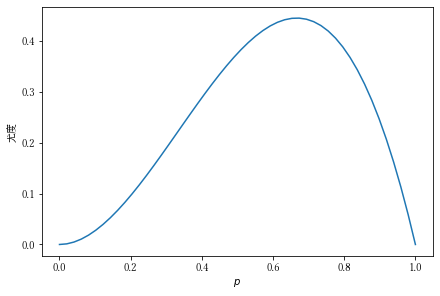

In [6]:
n = 3
p = np.linspace(0, 1)
x = 2

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(p, stats.binom.pmf(x, n, p))
ax.set_xlabel(r'$p$')
ax.set_ylabel('尤度')

リスト5.7: 尤度の計算例

In [7]:
n = 3
x = 2
p = [0.5, 0.4]

stats.binom.pmf(x, n, p)

array([0.375, 0.288])

リスト5.8: 事前確率と事後確率の比較



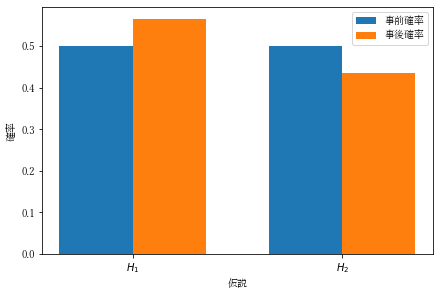

In [8]:
prior = [0.5, 0.5]
posterior = [0.566, 0.434]

index = np.arange(len(prior))
width = 0.35

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(index, prior, width, label='事前確率')
ax.bar(index + width, posterior, width, label='事後確率')

ax.set_xticks(index + width / 2)
ax.set_xticklabels([r'$H_1$', r'$H_2$'])
ax.set_xlabel('仮説')
ax.set_ylabel('確率')
ax.legend()

## 5.2 確率密度関数



### 5.2.2 連続一様分布



リスト5.9: 連続一様分布の例

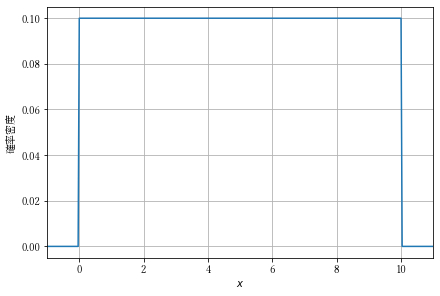

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['font.family'] = 'Yu Mincho'

# 最小値 a は loc、最大値 b は loc + scale の値として設定します
loc = 0
scale = 10
x = np.linspace(-2, 12, 400)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, stats.uniform.pdf(x, loc, scale))
ax.set_xlabel(r'$x$')
ax.set_ylabel('確率密度')
ax.set_xlim([-1, 11])
ax.grid()

### 5.2.3 正規分布



リスト5.10: 正規分布の確率密度の計算

In [10]:
mu = 5
sigma = 1.5
x = 3

stats.norm.pdf(x, mu, sigma)

0.10934004978399577

リスト5.11: 正規分布の例



Text(0, 0.5, '確率密度')

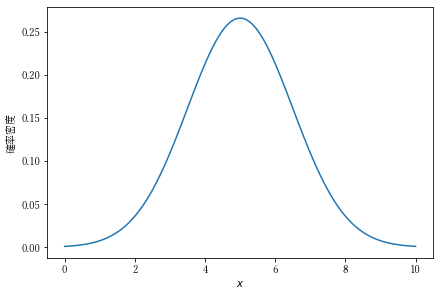

In [11]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, stats.norm.pdf(x, mu, sigma))
ax.set_xlabel(r'$x$')
ax.set_ylabel('確率密度')

リスト5.12: 正規分布におけるパラメータ $\mu$ と $\sigma$ の影響



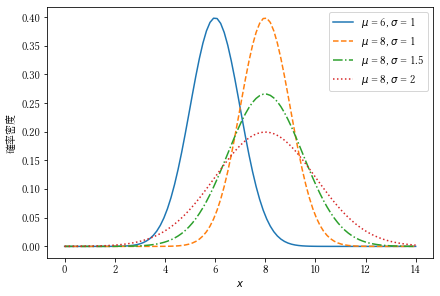

In [12]:
mus = [6, 8, 8, 8]
sigmas = [1, 1, 1.5, 2]
x = np.linspace(0, 14, 100)
ls = ['-', '--', '-.', ':']

fig, ax = plt.subplots(constrained_layout=True)

for mu, sigma, l in zip(mus, sigmas, ls):
    ax.plot(x, stats.norm.pdf(x, mu, sigma), l,
            label=rf'$\mu$ = {mu}, $\sigma$ = {sigma}')
    
ax.set_xlabel(r'$x$')
ax.set_ylabel('確率密度')
ax.legend()

リスト5.13: 正規分布の確率密度関数とその累積分布関数

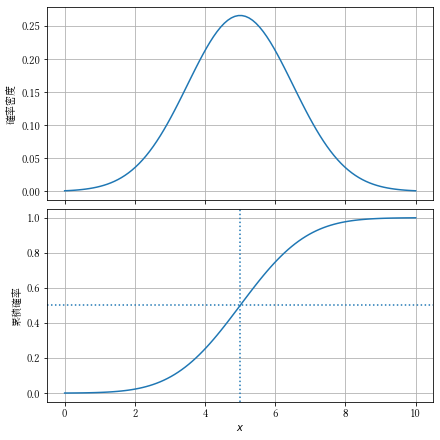

In [13]:
mu = 5
sigma = 1.5
x = np.linspace(0, 10, 100)

X = stats.norm(mu, sigma)

fig, axs = plt.subplots(2, 1, constrained_layout=True,
                        figsize=(6, 6), sharex=True)
                        
# 確率密度関数のグラフを描画
axs[0].plot(x, X.pdf(x))
axs[0].set_ylabel('確率密度')
axs[0].grid()

# 累積分布関数のグラフを描画
axs[1].plot(x, X.cdf(x))
axs[1].axvline(5, ls=':')
axs[1].axhline(0.5, ls=':')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel('累積確率')
axs[1].grid()

リスト5.14: `cdf` メソッドによる確率の計算



In [14]:
mu = 5
sigma = 1.5

X = stats.norm(mu, sigma)
X.cdf(5.5) - X.cdf(4.5)

0.26111731963647267

リスト5.15: 中心極限定理の例

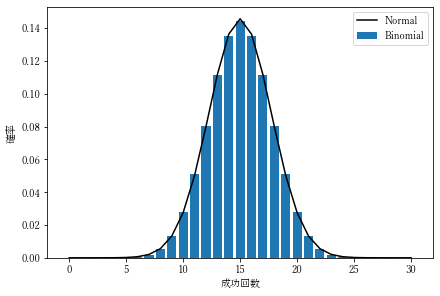

In [15]:
n = 30
p = 0.5
x = np.arange(n + 1)

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(x, stats.binom.pmf(x, n, p), label='Binomial')
ax.plot(x, stats.norm.pdf(x, n * p, np.sqrt(n * p * (1 - p))), 'k', label='Normal')
ax.set_xlabel('成功回数')
ax.set_ylabel('確率')
ax.legend()

### 5.2.4 パラメータ推定の流れ

リスト5.16: $x=3$ における $\mu=5$ の尤度の計算

In [16]:
mu = 5
sigma = 1
x = 3

stats.norm.pdf(x, mu, sigma)

0.05399096651318806

リスト5.17: $x=3$ における尤度関数のグラフ

Text(0, 0.5, '尤度')

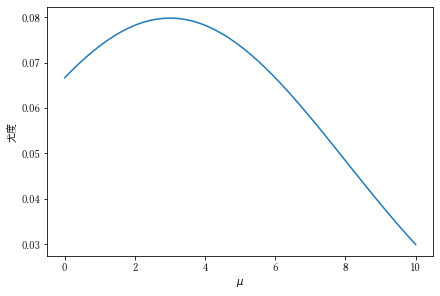

In [17]:
sigma = 5
x = 3
mu = np.linspace(0, 10)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(mu, stats.norm.pdf(x, mu, sigma))
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('尤度')